<a href="https://colab.research.google.com/github/AnuLoveCoding/Anu.lovescoding/blob/main/Titanic_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Eploratory Data Analysis**

<Axes: ylabel='count'>

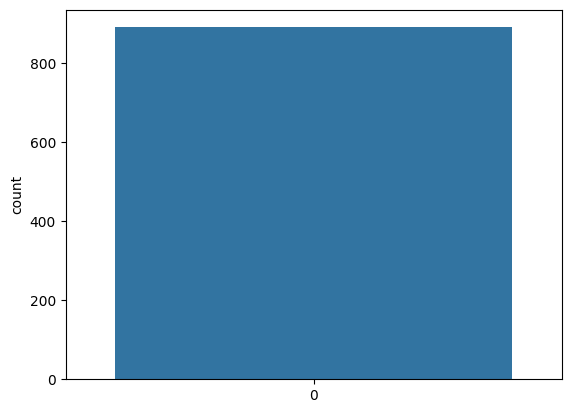

In [ ]:
## categorical attributes
sns.countplot(train['Survived'])

<Axes: ylabel='count'>

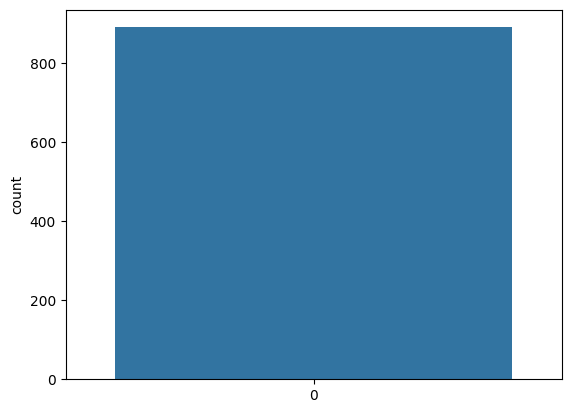

In [ ]:
sns.countplot(train['Pclass'])

<Axes: ylabel='count'>

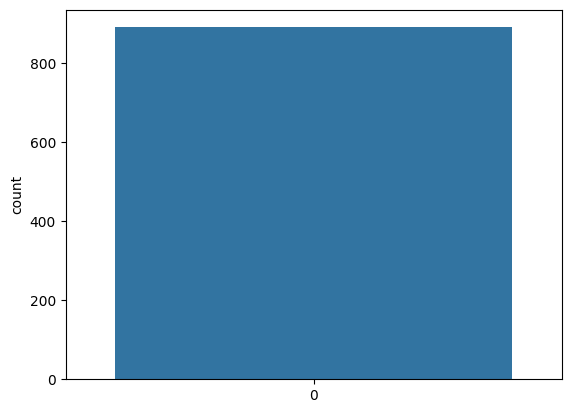

In [ ]:
sns.countplot(train['Pclass'])

In [ ]:
# numerical attributes

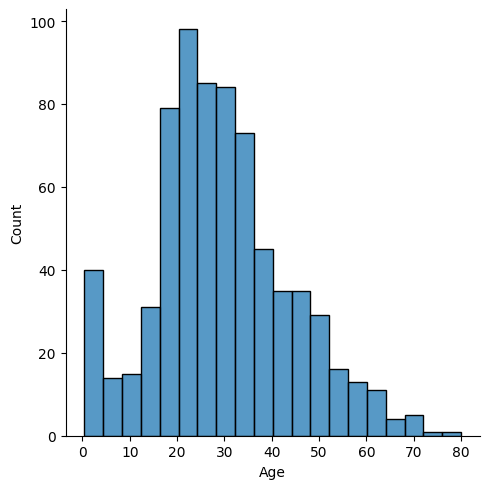

In [ ]:
sns.displot(train['Age'])

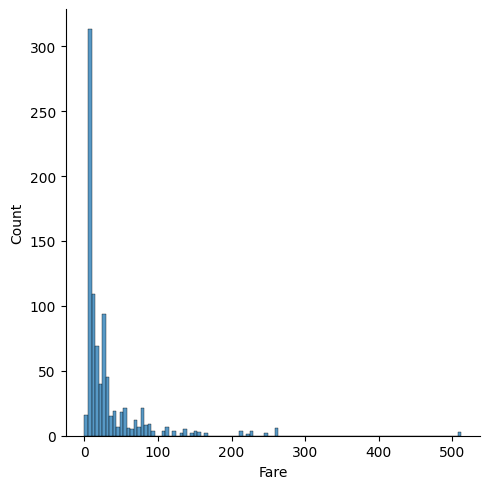

In [ ]:
sns.displot(train['Fare'])

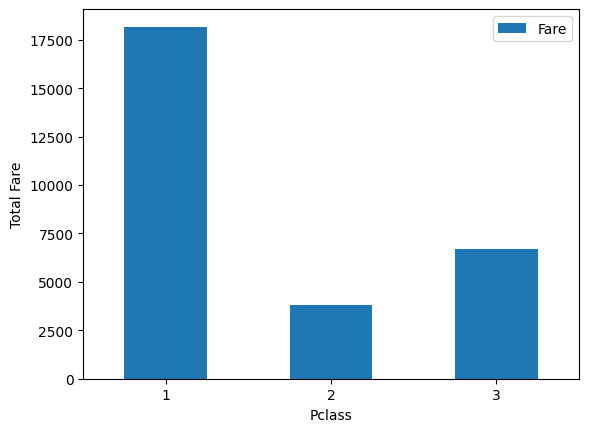

In [ ]:
class_fare = train.pivot_table(index = 'Pclass', values = 'Fare', aggfunc = np. sum)
class_fare.plot(kind = 'bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation = 0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

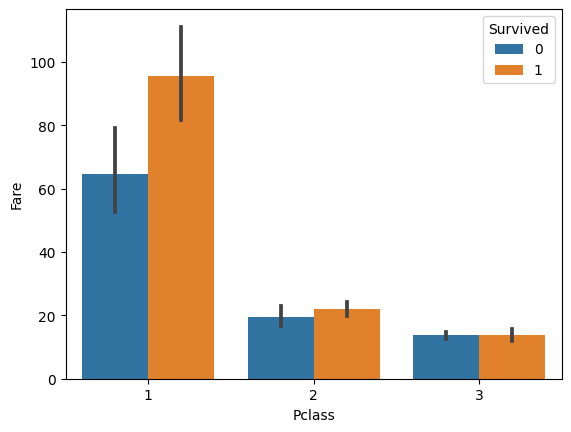

In [ ]:
sns.barplot(data = train, x = 'Pclass', y = 'Fare', hue = 'Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

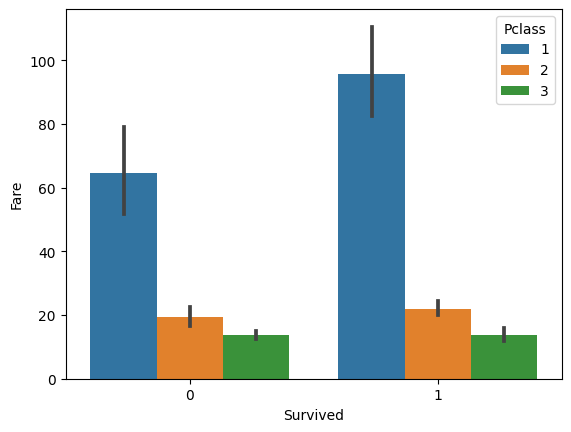

In [ ]:
sns.barplot(data = train, x = 'Survived', y = 'Fare', hue = 'Pclass')

# Data Preprocessing


In [ ]:
train_len = len(train)
# combine two dataframes
df = pd.concat([train, test], axis = 0)
df = df.reset_index(drop = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_len

891

In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
## find the null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
# drop or delete the column
df= df.drop(columns = ['Cabin'], axis = 1)

In [ ]:
df['Age'].mean()

29.881137667304014

In [ ]:
# fill missing values using mean of that numerical columns
df['Age'] = df['Age'].fillna(df['Age']. mean())
df['Fare'] = df['Fare'].fillna(df['Fare']. mean())


In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
# fill missing values using mode of that categorical columns
df['Embarked'] = df['Embarked'].fillna(df['Embarked']. mode()[0])

# Log transform for uniform data distribution

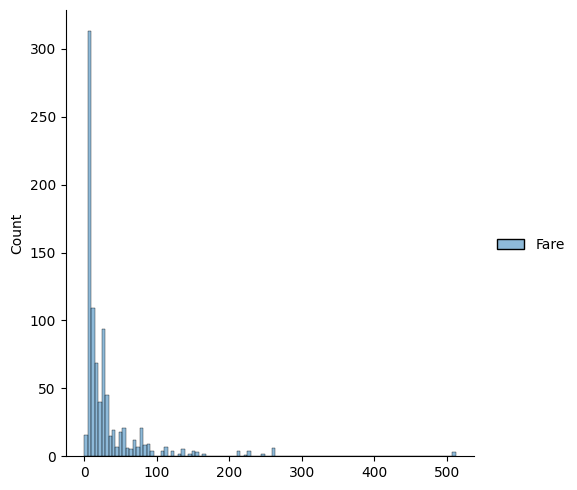

In [ ]:
sns.displot([train['Fare']])

In [ ]:
df['Fare'] = np.log(df['Fare'] + 1)

<Axes: ylabel='Density'>

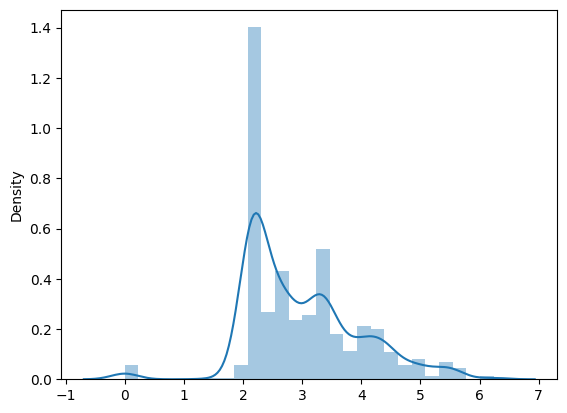

In [ ]:
sns.distplot([df['Fare']])

# Coorelation Matrix

<Axes: >

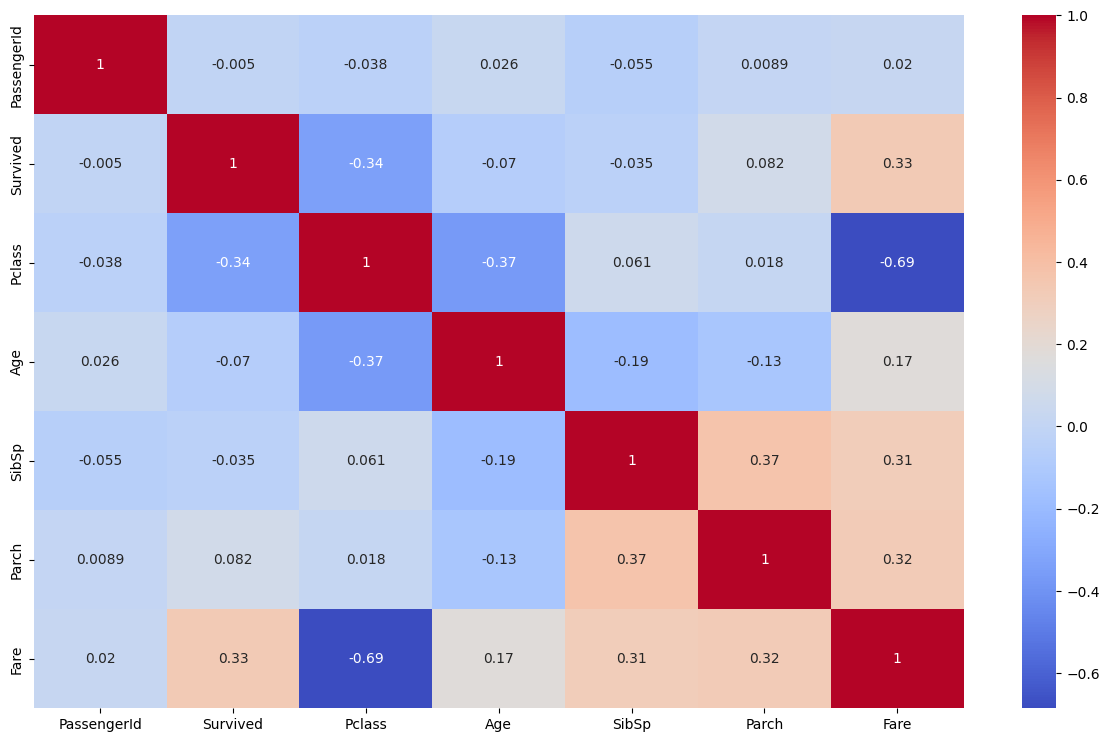

In [ ]:
corr = df.corr()
plt.figure(figsize = (15,9))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [ ]:
# drop unnecessary columns
df = df.drop(columns = ['Name','Ticket'], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']
le = LabelEncoder()


for col in cols:
  df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


# Train-Test Split

In [ ]:
train = df.iloc[:train_len,:]
test = df.iloc[train_len: , :]

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [ ]:
# input split
X = train.drop(columns = ['PassengerId','Survived'], axis = 1)
y = train['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


# Model Traning

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
  model.fit(x_train, y_train)
  print('Accuracy:', model.score(x_test, y_test))

  score = cross_val_score(model, X, y)
  print('Cv Score:', np.mean(score))





In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8071748878923767
Cv Score: 0.7833971502102819


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7443946188340808
Cv Score: 0.7722051346431487


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8116591928251121
Cv Score: 0.810344611135522


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.7982062780269058
Cv Score: 0.7912685958194714


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.7847533632286996
Cv Score: 0.8148327160881301


In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(verbose =0)
classify(model)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 